## ADRIAN AGUILAR
## TASK # 2 - PREPARE AND EXPLORE THE DATA

## Contents
- [1. Import and Prepare the data](#import)
    - [1.1 Data Cleaning](#cleaning)
    - [1.2 Data Reduction - Feature Selection & Extraction](#f_sel)        
    - [1.3 Data Transformation](#data_transf)
- [2. Perform Exploratory Data Analysis](#dataanalysis)
    - [2.1 Visualizing the data](#vis)
        - [Histogram](#histogram)
        - [Line Plot](#line)
        - [Scatter Plot](#scatter)
        - [Box Plot](#box)
    - [2.2 Correlation](#corr)
    - [2.3 Covariance](#cov)
- [3. Now is Your Turn - Data Exploratory](#exploratory)
    - [3.1 Plot Distribution of Customer's Ages](#plotdistages)

    

       
    


<a name="import"></a>
### 1. Import and prepare the data 

In [1]:
import math
import pandas as pd
import seaborn as sns 
%matplotlib inline
import numpy as np

In [2]:
#ds = pd.io.parsers.read_csv("default of credit card clients.csv")
credit = pd.read_csv('default of credit card clients.csv', header =1)

In [3]:
#head of the file
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit.describe()  #same as summary()  in R
#Note: The 'ID' column is also in the analysis so make sure to plan your feature selection accordingly.

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
#In order to check the data types of each variable you can use the info() function of Pandas as follows:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

# for this portion use : #https://github.com/NathanEpstein/Dora/blob/master/README.md 

#Data cleaning
#Data transformation
#How to deal with missing values?
#Data reduction
#Data discretization
#Text cleaning (if needed)
#TIP:
#Note: Once you've finished pre-processing the data you'll
#need to use Pandas to write the changes to a new .csv file so you #can use it in the next step.

What inferences can you make about the data after reviewing this describe() results?

Attribute Information:
NOTE: The following is updated information from the source’s author}
default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables
as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer
credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from
April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7
= the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005.
The measurement scale for the repayment status is:
-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay
for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight
months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in
September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of
bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September,
2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
Y: client's behavior; Y=0 then not default, Y=1 then default"


# Can you easily tell which features/variables are numeric or nominal?
#### This command credit.info() only shows INT data type assuming this is the only data type present in the soruce.

<a name="cleaning"></a>
### 1.2 Data Cleaning

In [6]:
#!pip install Dora
#Data Cleaning 
from Dora import Dora
dora = Dora()

dora = Dora(output = 0, data = credit)
dora.data



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:

#Adrian  NO MISSING VALUES TO IMPUTE    
# impute the missing values (using the average of each column)
#dora.impute_missing_values()
#dora.data


# scale the values of the input variables (center to mean and scale to unit variance)
#dora.scale_input_values()
#dora.data

<a name="f_sel"></a>
### 1.2 Data Reduction - Feature Selection & Extraction

In [8]:
# feature selection / removing a feature
dora.data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [9]:
dora.remove_feature('ID')

In [10]:
dora.data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


<a name="data_transf"></a>
### 1.3 Data Transformation 

In [11]:
# extract an ordinal feature through one-hot encoding
dora.extract_ordinal_feature('SEX')
dora.data

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX=1,SEX=2
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,689,0,0,0,0,1,0.0,1.0
1,120000,2,2,26,-1,2,0,0,0,2,...,3261,0,1000,1000,1000,0,2000,1,0.0,1.0
2,90000,2,2,34,0,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0.0,1.0
3,50000,2,1,37,0,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0.0,1.0
4,50000,2,1,57,-1,0,-1,0,0,0,...,19131,2000,36681,10000,9000,689,679,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,3,1,39,0,0,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,1.0,0.0
29996,150000,3,2,43,-1,-1,-1,-1,0,0,...,0,1837,3526,8998,129,0,0,0,1.0,0.0
29997,30000,2,2,37,4,3,2,-1,0,0,...,19357,0,0,22000,4200,2000,3100,1,1.0,0.0
29998,80000,3,1,41,1,-1,0,0,0,-1,...,48944,85900,3409,1178,1926,52964,1804,1,1.0,0.0


In [12]:
dora.extract_ordinal_feature('EDUCATION')
dora.data

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,default payment next month,SEX=1,SEX=2,EDUCATION=0,EDUCATION=1,EDUCATION=2,EDUCATION=3,EDUCATION=4,EDUCATION=5,EDUCATION=6
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,120000,2,26,-1,2,0,0,0,2,2682,...,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,90000,2,34,0,0,0,0,0,0,29239,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,50000,1,37,0,0,0,0,0,0,46990,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,39,0,0,0,0,0,0,188948,...,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29996,150000,2,43,-1,-1,-1,-1,0,0,1683,...,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29997,30000,2,37,4,3,2,-1,0,0,3565,...,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29998,80000,1,41,1,-1,0,0,0,-1,-1645,...,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
dora.extract_ordinal_feature('MARRIAGE')
dora.data

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION=1,EDUCATION=2,EDUCATION=3,EDUCATION=4,EDUCATION=5,EDUCATION=6,MARRIAGE=0,MARRIAGE=1,MARRIAGE=2,MARRIAGE=3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,90000,34,0,0,0,0,0,0,29239,14027,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,50000,37,0,0,0,0,0,0,46990,48233,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,30000,37,4,3,2,-1,0,0,3565,3356,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<a name="dataanalysis"></a>
## 2. Perform Exploratory Data Analysis

<a name="vis"></a>
## 2.1 Visualizing the data

In [14]:
import matplotlib.pyplot as plt

In [15]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


<a name="histogram"></a>
### Histogram 

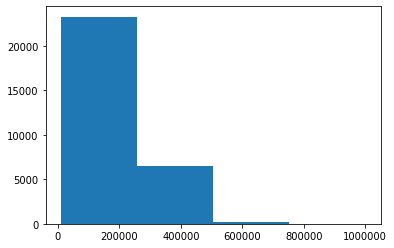

In [16]:
#Histogram 
plt.hist(credit['LIMIT_BAL'], bins=4)
plt.show()

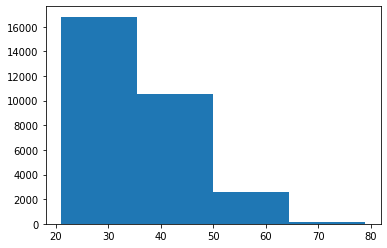

In [17]:
plt.hist(credit['AGE'], bins=4)
plt.show()

<a name="line"></a>
### Line Plot

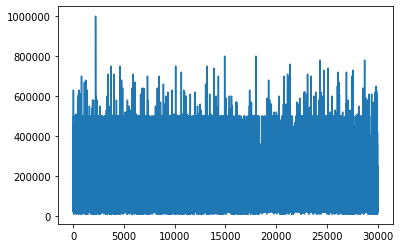

In [18]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

#TIP:
#Note: There are numerous options for line plots (and all others). 
#Check the resources for additional information like adding axis and title information.

<a name="scatter"></a>
### Scatter Plots

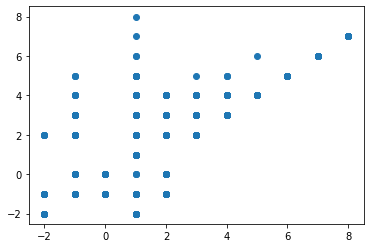

In [19]:
x = credit['PAY_0']
y = credit['PAY_2']
plt.scatter(x,y)
plt.show()
#TIP:
#Note: There are numerous examples of scatter plots with matplotlib in the resources

<a name="box"></a>
### Box Plots

In [20]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


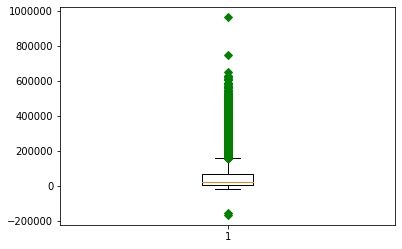

In [21]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

#TIP:
#Note: There are numerous examples of box plots with matplotlib in the resources

<a name="corr"></a>
## 2.2 Correlation

In [22]:
corrMat = credit.corr()
print(corrMat)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

In [23]:
##After validate Correlation due to a High Correlation between variables we should remove BILL_AMT4 and BILL_AMT6

dora.remove_feature('BILL_AMT4')


In [24]:
dora.remove_feature('BILL_AMT6')
dora.data

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION=1,EDUCATION=2,EDUCATION=3,EDUCATION=4,EDUCATION=5,EDUCATION=6,MARRIAGE=0,MARRIAGE=1,MARRIAGE=2,MARRIAGE=3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,90000,34,0,0,0,0,0,0,29239,14027,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,50000,37,0,0,0,0,0,0,46990,48233,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,30000,37,4,3,2,-1,0,0,3565,3356,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<a name="cov"></a>
## 2.3 Covariance

In [25]:
covMat = credit.cov()
print(covMat)

#TIP:
#Note: Notice that the 'ID' is shown in the matrix above?
#Be sure to use iloc when establishing your variable so you can select the specific features/variables you want to measure.

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

In [26]:

#1. Now that we've reviewed all of the basic components used in exploratory data analysis it is time for you to perform this analysis on all of the CreditOne data so you can fully understand the relevance of all features and how they impact one another and, most importantly, customer default.

#Here are some guidelines that will help you:

#For this task your EDA should resemble to depth of the Titanic EDA example provided in the resources.
#As you explore the data remember the whole purpose of EDA is to answer questions and summarize the main points found in the data.
#This is done both with Statistical methods as well as visualization methods and we've only introduced a few of both here to help you proceed.
#It is your job as a Data Scientist to provide the best solution for this problem.

<a name="exploratory"></a>
## 3. Now it is your turn - Data Exploratory

In [27]:
#Group by gender - Gender (1 = male; 2 = female)
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

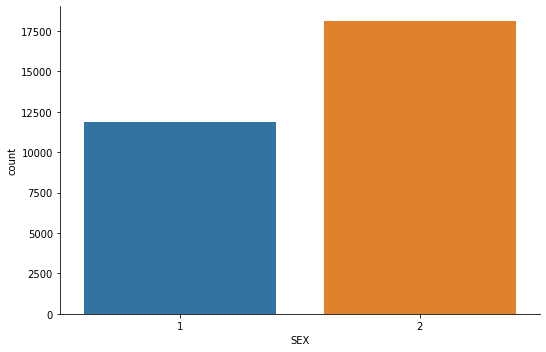

In [28]:
# Instead of a group by, use seaborn to plot the count of users for each sex
sx = sns.catplot('SEX', data=credit, kind='count', aspect=1.5)

#Majority are female 

In [29]:
#Group by Education 
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

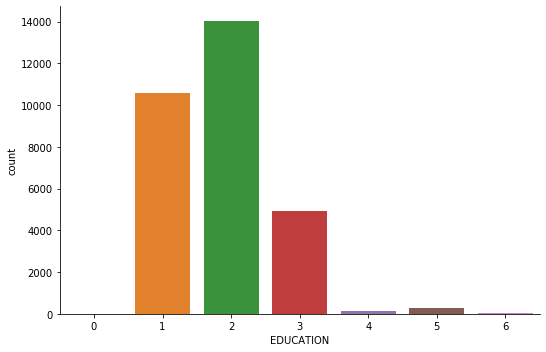

In [30]:
#Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
ed = sns.catplot('EDUCATION', data=credit, kind='count', aspect=1.5)

#Majority University / Graduate School or High School.

In [31]:
#Group by Marital Status  
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

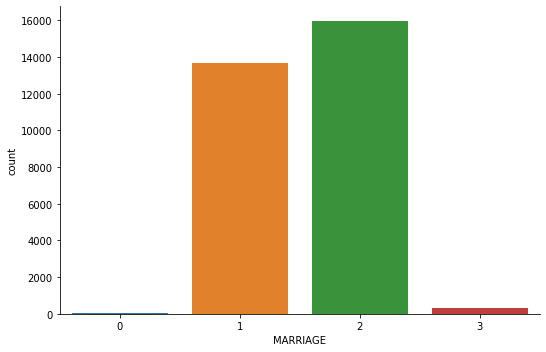

In [32]:
#Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
ma = sns.catplot('MARRIAGE', data=credit, kind='count', aspect=1.5)

#Majority Single or Married. 

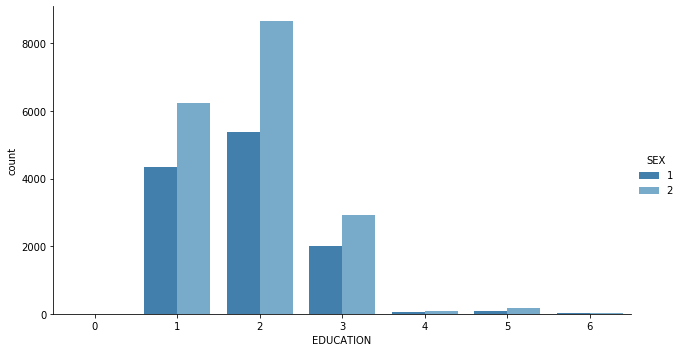

In [33]:
g = sns.catplot('EDUCATION', data=credit, hue='SEX', kind='count', aspect=1.75, palette="tab20c")
g.set_xlabels('EDUCATION')

In [34]:
# Number of customers with default payment next month in each education range group by sex 
credit.pivot_table('default payment next month', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,0,1,2,3,4,5,6,All
SEX,,,,,,,,
1,0,906,1408,545,4,6,4,2873
2,0,1130,1922,692,3,12,4,3763
All,0,2036,3330,1237,7,18,8,6636


In [35]:
No_Default_Payment = credit[credit['default payment next month']==0]

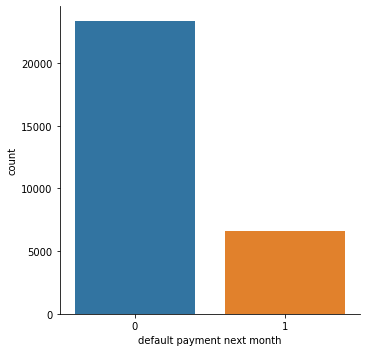

In [36]:
# Factor plot of those who have the default payment and who doesn't
sns.catplot('default payment next month', data=credit, kind='count')

#client's behavior; Y=0 then not default, Y=1 then default"
#Majority doesn't have the default payment

In [37]:
#total not default payment
len(No_Default_Payment)

23364

In [38]:
credit.AGE.describe()
#Average and median age of customers are 35 and 34 years old, respectively

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [39]:
# Drop missing values for the records in which age customer is missing
age = credit['AGE'].dropna()

Text(0.5, 1.0, "Distribution of Customers' Ages")

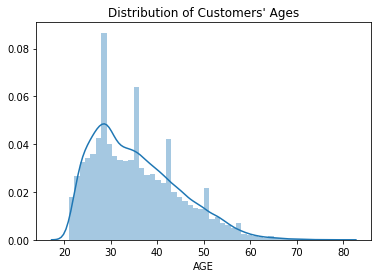

In [40]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Customers' Ages")

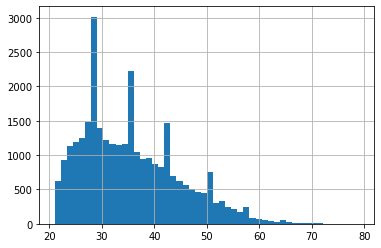

In [41]:
# Another way to plot a histogram of ages is shown below
credit['AGE'].hist(bins=50)

<a name="plotdistages"></a>

### kde plot, Distribution of Customer's Ages
### Grouped by Gender

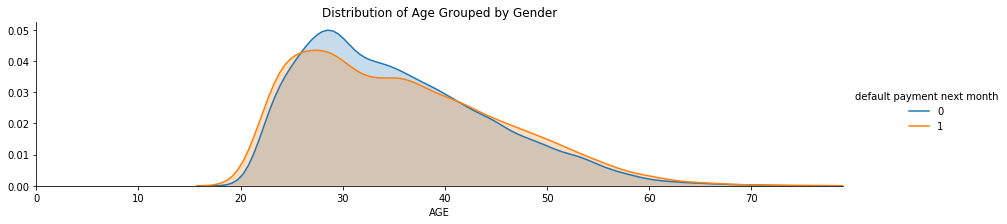

In [42]:
fig = sns.FacetGrid(credit, hue='default payment next month', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

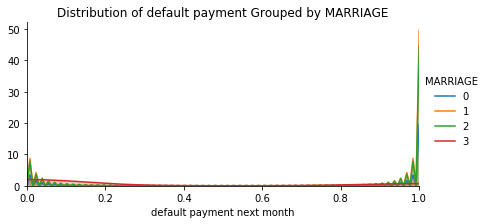

In [43]:
fig = sns.FacetGrid(credit, hue='MARRIAGE', aspect=2)
fig.map(sns.kdeplot, 'default payment next month', shade=True)
oldest = credit['default payment next month'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of default payment Grouped by MARRIAGE')
fig.add_legend()

### Grouped by Education

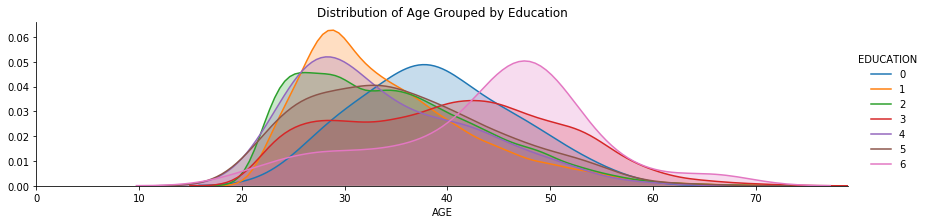

In [44]:
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of AGE Grouped by Education')
fig.add_legend()

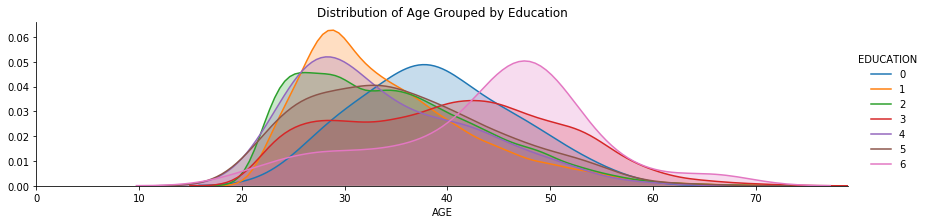

In [45]:
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Education')
fig.add_legend()

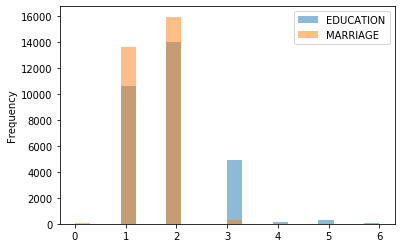

In [46]:
edu_Mar_col = ['EDUCATION', 'MARRIAGE']
credit[edu_Mar_col].plot.hist(alpha=0.5,bins=20);